# PCA on Iris Varieties


The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

![Iris](./iris.png)

A Summary of the PCA Approach

- Standardize the data.
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
- Sort eigenvalues in descending order and choose the **k** eigenvectors that correspond to the **k** largest eigenvalues where **k** is the number of dimensions of the new feature subspace (**k**≤**d**)/.
- Construct the projection matrix W from the selected **k** eigenvectors.
- Transform the original dataset X via W to obtain a **k**-dimensional feature subspace Y.

## Understanding and loading the data

The data set consists of:
* **150 samples** 
* **3 labels: species of Iris (_Iris setosa, Iris virginica_ and _Iris versicolor_)** 
* **4 features: length and the width of the sepals and petals**, in centimetres.



In [13]:
# install relevant modules
import numpy as np
import pandas as pd

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

import seaborn as sns
sns.set(style="white", color_codes=True)

In [14]:
# Read file
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.head(2)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [15]:
# split data table into data X and class labels y

X = df.ix[:,0:4].values
y = df.ix[:,4].values

print(X[:1, :])
print(y[:1])

[[ 5.1  3.5  1.4  0.2]]
['Iris-setosa']


## Exploratory Visualization


Our iris dataset is now stored in form of a 150 x 4 matrix where the columns are the different features, and every row represents a separate flower sample. Each sample row X can be pictured as a 4-dimensional vect:

$$ \mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} 
= \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix}$$


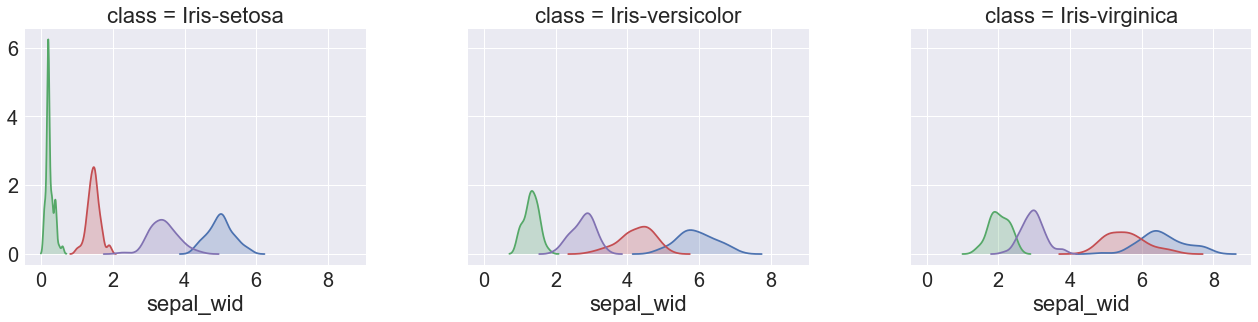

In [65]:
import seaborn as sns

#g = sns.FacetGrid(df, hue="class", col=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'], col_wrap=4, sharex=False)

g = sns.FacetGrid(df, col="class", size=5, aspect = 1.2)
g.map(sns.kdeplot, "sepal_len", shade=True).fig.subplots_adjust(wspace=.3)
g.map(sns.kdeplot, "petal_len", shade=True, color = "r").fig.subplots_adjust(wspace=.3)
g.map(sns.kdeplot, "petal_wid", shade=True, color = "g").fig.subplots_adjust(wspace=.3)
g.map(sns.kdeplot, "sepal_wid", shade=True, color = "m").fig.subplots_adjust(wspace=.3)
sns.set(font_scale=2)

## Standardizing

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [54]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

X_std[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

### Covariance Matrix
The classic approach to PCA is to perform the eigendecomposition on the covariance matrix ΣΣ, which is a dXd matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right)$$

We can summarize the calculation of the covariance matrix via the following matrix equation:

$$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$$

where $\bar{x}$ is the mean vector $$\mathbf{\bar{x}} = \sum\limits_{k=1}^n x_{i}.$$

The mean vector is a dd-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [57]:
# Calculate covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

# Could alternatively use:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [58]:
# Eigendecomposition on the covariance matrix:

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


### Correlation Matrix

The correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. 

In [60]:
# Eigendecomposition on the Correlation matrix:

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


## Singular Vector Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:


In [61]:
u,s,v = np.linalg.svd(X_std.T)
u


array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

## Selecting Principal Components

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes.

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [63]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.


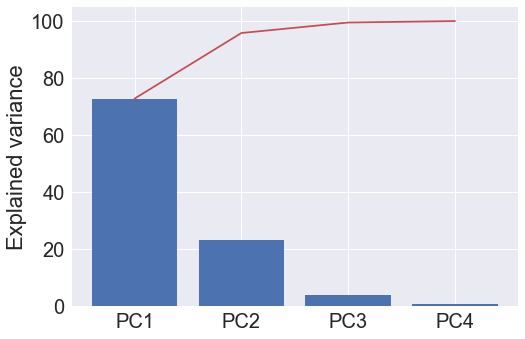

In [87]:
# Explained variance
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#pc_col = ['PC1', 'PC2', 'PC3', 'PC4']
index = [1, 2, 3, 4]
plt.bar(pc_col, var_exp)
plt.xticks(index , ('PC1', 'PC2', 'PC3', 'PC4'))
plt.plot(index , cum_var_exp, c = 'r')
plt.ylabel('Explained variance')
plt.show()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

### Construction of the projection matrix 

Projection matrix  will be used to transform the Iris data onto the new feature subspace.Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our dxk-dimensional eigenvector matrix W.

In [88]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [91]:
Y = X_std.dot(matrix_w)
Y[:3]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731]])

In [114]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## PCA in scikit-learn

Simple implementation of PCA in scikit-learn is as follows:


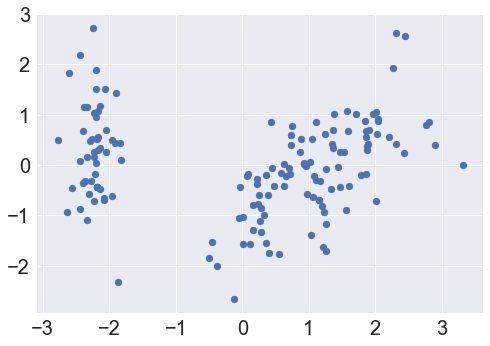

In [126]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

Y_sklearn[:3]
new_list = []
for row in range(len(y)):
    if y[row]=='Iris-setosa':
        new_list.append([Y_sklearn[:, 0], Y_sklearn[:, 1], 0, 'Iris-setosa'])
    elif y[row]=='Iris-versicolor':
        new_list.append([Y_sklearn[:, 0], Y_sklearn[:, 1], 0, 'Iris-versicolor'])
    else:
        new_list.append([Y_sklearn[:, 0], Y_sklearn[:, 1], 0, 'Iris-verginica'])
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1])
plt.show()